In [20]:
# mlp for regression from here: https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/ 
from numpy import sqrt
from numpy import loadtxt
import numpy as np
from pandas import read_csv
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# load dataset from csv file
#df = read_csv("pv_large.csv", header=None)
#dataset = loadtxt('pv_large.csv', delimiter=',')
dataset = loadtxt('pv_large_4d_sample.csv', delimiter=',')
feature_names = ['d1', 'd2', 'd3', 'd4', 'eta']


#df.columns = feature_names
#print(df.head())

#df = df.rename(columns={'eta': 'efficiency'})
#print(df.describe())


#Split into features and target (Price)
#X = df.drop('efficiency', axis = 1)
#y = df['efficiency']
X = dataset[:,0:4]
y = dataset[:,4]


# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# determine the number of input features
n_features = X_train.shape[1]

# define model
#model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
#model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=4))
model.add(Dense(20, activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

# compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

# fit model
history = model.fit(X_train, y_train, validation_split=0.2, epochs =120)




(3350, 4) (1650, 4) (3350,) (1650,)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 20)                100       
                                                                 
 dense_33 (Dense)            (None, 20)                420       
                                                                 
 dense_34 (Dense)            (None, 14)                294       
                                                                 
 dense_35 (Dense)            (None, 14)                210       
                                                                 
 dense_36 (Dense)            (None, 10)                150       
                                                                 
 dense_37 (Dense)            (None, 8)                 88        
                                                                 
 dense_38 (Dense) 

Epoch 48/120
84/84 [==============================] - 0s 984us/step - loss: 1.5174e-06 - mae: 9.4489e-04 - val_loss: 1.4178e-06 - val_mae: 9.0741e-04
Epoch 49/120
84/84 [==============================] - 0s 974us/step - loss: 1.4101e-06 - mae: 9.1023e-04 - val_loss: 1.3536e-06 - val_mae: 8.8170e-04
Epoch 50/120
84/84 [==============================] - 0s 968us/step - loss: 1.4517e-06 - mae: 9.2566e-04 - val_loss: 1.7028e-06 - val_mae: 0.0010
Epoch 51/120
84/84 [==============================] - 0s 984us/step - loss: 1.4605e-06 - mae: 9.3526e-04 - val_loss: 1.2059e-06 - val_mae: 8.2304e-04
Epoch 52/120
84/84 [==============================] - 0s 960us/step - loss: 1.2841e-06 - mae: 8.6165e-04 - val_loss: 1.7591e-06 - val_mae: 9.8943e-04
Epoch 53/120
84/84 [==============================] - 0s 974us/step - loss: 1.4472e-06 - mae: 9.1027e-04 - val_loss: 1.2892e-06 - val_mae: 8.5662e-04
Epoch 54/120
84/84 [==============================] - 0s 963us/step - loss: 1.2839e-06 - mae: 8.7915e-04

84/84 [==============================] - 0s 964us/step - loss: 1.0847e-06 - mae: 7.9719e-04 - val_loss: 7.8923e-07 - val_mae: 7.0782e-04
Epoch 103/120
84/84 [==============================] - 0s 969us/step - loss: 1.0392e-06 - mae: 7.9976e-04 - val_loss: 6.1278e-07 - val_mae: 6.0428e-04
Epoch 104/120
84/84 [==============================] - 0s 969us/step - loss: 8.6204e-07 - mae: 7.0672e-04 - val_loss: 1.0588e-06 - val_mae: 8.2170e-04
Epoch 105/120
84/84 [==============================] - 0s 959us/step - loss: 6.6387e-07 - mae: 6.3413e-04 - val_loss: 6.5364e-07 - val_mae: 6.2886e-04
Epoch 106/120
84/84 [==============================] - 0s 961us/step - loss: 7.8910e-07 - mae: 6.9682e-04 - val_loss: 1.0399e-06 - val_mae: 8.4514e-04
Epoch 107/120
84/84 [==============================] - 0s 971us/step - loss: 8.7136e-07 - mae: 7.3435e-04 - val_loss: 7.5509e-07 - val_mae: 7.2308e-04
Epoch 108/120
84/84 [==============================] - 0s 957us/step - loss: 1.0660e-06 - mae: 8.2828e-04 - 

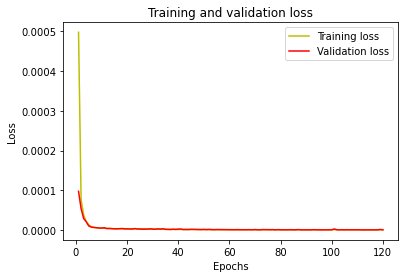

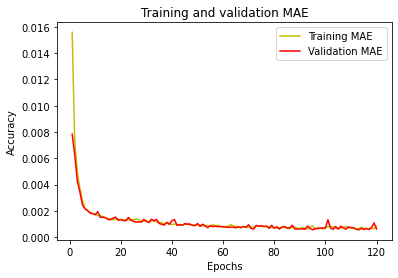

In [21]:

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [3]:
print(X_test[:5])

[[0.02320889 0.25976484 0.43988035 0.32197085]
 [0.02467979 0.24065163 0.87346555 0.95095165]
 [0.02789457 0.25293428 0.41056239 0.49996919]
 [0.00892507 0.25726333 0.26870021 0.19764451]
 [0.01189334 0.24915437 0.87685312 0.03675811]]


In [4]:

############################################
#Predict on test data
predictions = model.predict(X_test)
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])
##############################################

#Comparison with other models..
#Neural network - from the current code
mse_neural, mae_neural = model.evaluate(X_test, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)



Predicted values are:  [[0.0515955 ]
 [0.06857511]
 [0.04846969]
 ...
 [0.04896021]
 [0.05534396]
 [0.05881257]]
Real values are:  [0.05187466 0.06742847 0.04968628 0.05475538 0.07920801]
52/52 [==============================] - 0s 648us/step - loss: 7.0601e-07 - mae: 6.1360e-04
Mean squared error from neural net:  7.060124289637315e-07
Mean absolute error from neural net:  0.0006135986186563969


In [25]:
# load dataset from csv file
#df = read_csv("pv_4_layer.csv", header=None)
dataset2 = loadtxt('pv_4_layer.csv', delimiter=',')

X_test = dataset2[:,0:4]/200.
y_expected = dataset2[:,4]

predictions = model.predict(X_test)
error=0.
print(len(y_expected))
for i in range(0, len(y_expected)):
    error += np.abs(predictions[i][0]-y_expected[i])
print(100*error/len(y_expected))

40000
0.048408885760762244


In [127]:
a = 4.
b = 49.

print(np.isclose(a,b,atol=0.5))
#g = open("sampled_4_layer.dat")
for i in range(0, len(X_train[:,0])):
    d1 = X_train[i,0] * 200
    d2 = X_train[i,1] * 200
    d3 = X_train[i,2] * 200
    d4 = X_train[i,3] * 200
    if np.isclose(a,d1, atol=1) and np.isclose(b, d2, atol=1):
        print(X_train[i,0]*200, X_train[i,1]*200, X_train[i,2]*200, X_train[i,3]*200, y_train[i])
    
    

False
3.775678917648396 48.83222561117087 102.26832007405223 55.73405724131184 0.054546510514596386
4.9062453333870035 48.75649640904523 127.23288713850185 80.87899399918709 0.04995771707900216
3.1210729854494126 48.28120963611302 65.03570744413189 174.95922535410932 0.06896362490543699
3.431020650868678 48.332864197096164 144.19707566610492 165.75858038434538 0.06839122850921613
3.6102695453251092 49.12557942633004 166.08928207901806 54.53287167114127 0.054925902222094675
3.9917476356994976 48.43529510307617 94.95952370000916 16.786632177716655 0.07485149726005795
4.086123697186624 48.335881348671364 110.21347588273373 160.89157157875297 0.06925814429006298
3.4051974234151303 49.77907045017288 18.10748878534748 39.76482237568146 0.07089530600255904
4.2217776593012175 49.328653773405385 76.53876389435477 188.5132476217723 0.07059533445460778
3.3034467353273413 50.000153029375426 48.62592582946442 115.54259783778261 0.04733162304749289
3.283724675950902 48.987304207677454 60.46208201054

3.990728147637594 48.94590590403902 54.73631701358575 14.91805953952726 0.07474199392988977
4.614368493029625 48.59616090969744 49.24124976790624 105.38934495715742 0.04405990568796637
4.68788680212209 48.29002225490897 194.77494481120274 125.89089833064678 0.05636808994253343
3.000792614737558 48.905933909911 196.69421189058232 17.855323302633735 0.07436478854084394
3.9509298070188894 49.905781677009074 196.33322360460707 198.50178907296353 0.06569875490347103
3.493277844273427 49.01571697836016 101.88363722793751 163.50424260097336 0.06959953465920349
4.35509440047876 49.257368791600925 116.39708051484075 178.98231825604265 0.06958992214091704
3.5527145223043024 49.28591915915071 190.40509847542518 181.41046754957821 0.06748626090362247
3.7691801990766223 48.65570995057176 74.62320983993027 118.76934962942127 0.05428466423185156
4.410597624867746 48.74202075919883 15.196327902021201 199.32286919978847 0.06590762299899004
3.4862262145838008 48.21907398256308 9.008415847641823 44.16414